In [13]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('./UkraineExports.csv')

In [68]:
G = nx.Graph()

G.add_weighted_edges_from(df)

nx.draw(G, with_labels=True)


ValueError: too many values to unpack (expected 3)

In [3]:
ue19 = pd.read_csv('./UkraineExports2019.csv', header=None)
ue20 = pd.read_csv('./UkraineExports2020.csv', header=None)
ue21 = pd.read_csv('./UkraineExports2021.csv', header=None)

In [30]:
ue19Arr = []
for i in range(0, len(ue19)):
    ue19Arr.append(['Ukraine', ue19[0][i], ue19[1][i]])

ue19Arr = np.array(ue19Arr)

ue20Arr = []
for i in range(0, len(ue20)):
    ue20Arr.append(['Ukraine', ue20[0][i], ue20[1][i]])

ue20Arr = np.array(ue20Arr)

ue21Arr = []
for i in range(0, len(ue21)):
    ue21Arr.append(['Ukraine', ue21[0][i], ue21[1][i]])

ue21Arr = np.array(ue21Arr)

In [41]:
# node size list
ue19nodeSize = [900]
for i in range(0, len(ue19Arr)):
    ue19nodeSize.append(round(float(ue19Arr[i][2]) * 100))

ue20nodeSize = [900]
for i in range(0, len(ue20Arr)):
    ue20nodeSize.append(round(float(ue20Arr[i][2]) * 100))

ue21nodeSize = [900]
for i in range(0, len(ue21Arr)):
    ue21nodeSize.append(round(float(ue21Arr[i][2]) * 100))

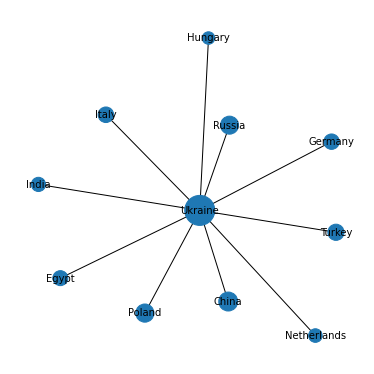

In [48]:
# create graph from 2019 array data
G = nx.Graph()

# add nodes
G.add_weighted_edges_from(ue19Arr)

# create a plot
plt.figure(figsize=(5,5))

# draw graph
nx.draw(G, node_size=ue19nodeSize, with_labels=True, font_size=10)

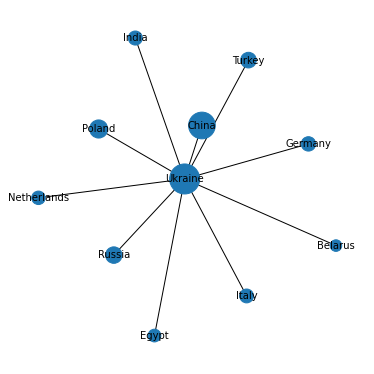

In [46]:
# create graph from 2020 array data
G = nx.Graph()

# add nodes
G.add_weighted_edges_from(ue20Arr)

# create a plot
plt.figure(figsize=(5,5))

# draw graph
nx.draw(G, node_size=ue20nodeSize, with_labels=True, font_size=10)

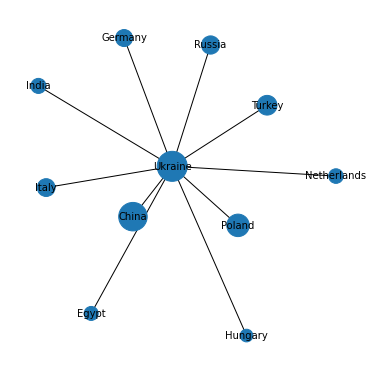

In [47]:
# create graph from 2021 array data
G = nx.Graph()

# add nodes
G.add_weighted_edges_from(ue21Arr)

# create a plot
plt.figure(figsize=(5,5))

# draw graph
nx.draw(G, node_size=ue21nodeSize, with_labels=True, font_size=10)

In [64]:
# replace "Ukraine" with "2019"
for i in range(0, len(ue19Arr)):
    ue19Arr[i][0] = '2019'

# replace "Ukraine" with "2020"
for i in range(0, len(ue20Arr)):
    ue20Arr[i][0] = '2020'

# replace "Ukraine" with "2021"
for i in range(0, len(ue21Arr)):
    ue21Arr[i][0] = '2021'

# combine all the data
combinedArr = np.concatenate((ue19Arr, ue20Arr, ue21Arr), axis=0)

# convert to dataframe
df = pd.DataFrame(combinedArr, columns=['Year', 'Country', 'Exports'])
df = df.astype({'Exports': 'float64'})

df.head()

,Year,Country,Exports
0,2019,China,3.593
1,2019,Poland,3.296
2,2019,Russia,3.243
3,2019,Turkey,2.619
4,2019,Italy,2.418


In [66]:
# create bubble graph for 2019
labels = ['Year', 'Country', 'Exports']
fig = go.Figure(data=[go.Scatter(
                x=df['Year'], y=df['Exports'],
                mode='markers',
                marker=dict(size=df['Exports'] * 5),
                text=df['Country']
                )])

fig.show()